In [1]:
pip install keras tensorflow scikit-learn numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load ARP MITM data and labels
arp_mitm_data = pd.read_csv('Fuzzing_dataset.csv')
arp_mitm_labels = pd.read_csv('Fuzzing_labels.csv')

# Use the union of features for training and evaluation
selected_features = [64, 9, 74, 12, 77, 78, 79, 14, 24, 27, 108, 51, 58, 62, 63]
arp_mitm_data = arp_mitm_data.iloc[:, selected_features]

# Assuming the column containing the labels is named 'x' (adjust if different)
arp_mitm_data['Label'] = arp_mitm_labels['x']

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
arp_mitm_data['Label'] = label_encoder.fit_transform(arp_mitm_data['Label'])

# Split the data into features and labels
X = arp_mitm_data.drop(columns=['Label'])
y = arp_mitm_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

import time  # Import the time module

# Start timing before making predictions
start_time = time.time()

# Make predictions on the training and testing data
lda_training = lda.predict(X_train)
lda_testing = lda.predict(X_test)

# End timing after predictions are made
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Total prediction time: {elapsed_time:.10f} seconds")
print(f"Average time per instance: {elapsed_time / (len(X_train) + len(X_test)):.10f} seconds")


# Convert numerical labels back to strings for classification report
target_names = label_encoder.inverse_transform(lda.classes_).astype(str)

# Print classification reports and accuracy scores
print("--- Training ---")
print(classification_report(y_train, lda_training, target_names=target_names))
print("Accuracy:", accuracy_score(y_train, lda_training))

print("--- Test Data ---")
print(classification_report(y_test, lda_testing, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, lda_testing))


Total prediction time: 0.0678441525 seconds
Average time per instance: 0.0000000302 seconds
--- Training ---
              precision    recall  f1-score   support

           0       0.81      1.00      0.89   1449144
           1       0.77      0.02      0.04    346166

    accuracy                           0.81   1795310
   macro avg       0.79      0.51      0.47   1795310
weighted avg       0.80      0.81      0.73   1795310

Accuracy: 0.8097086297074043
--- Test Data ---
              precision    recall  f1-score   support

           0       0.81      1.00      0.89    362211
           1       0.78      0.02      0.04     86617

    accuracy                           0.81    448828
   macro avg       0.79      0.51      0.47    448828
weighted avg       0.80      0.81      0.73    448828

Accuracy: 0.8095484238951224


In [3]:
import numpy as np

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


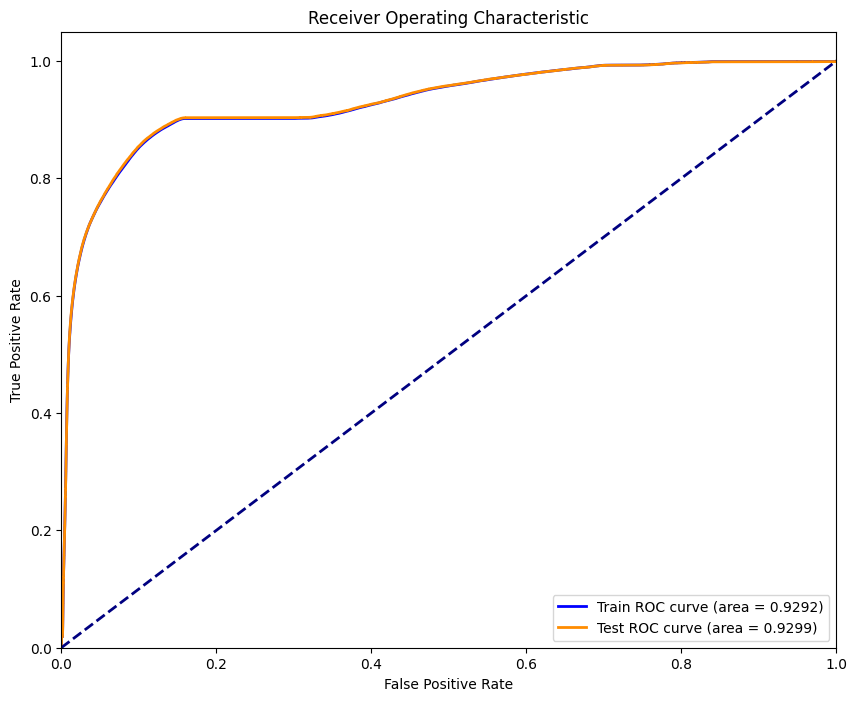

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Get the scores from the LDA model
lda_scores_train = lda.decision_function(X_train)
lda_scores_test = lda.decision_function(X_test)

# Compute ROC curve and ROC area for training data
fpr_train, tpr_train, _ = roc_curve(y_train, lda_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for test data
fpr_test, tpr_test, _ = roc_curve(y_test, lda_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for training data
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.4f)' % roc_auc_train)

# Plot ROC curve for test data
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.4f)' % roc_auc_test)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()
